# Start of PCA

In [1]:
import pandas as pd

one_hot_encoded_df2 = pd.read_csv('data/model/scantronMath_38.csv')


In [3]:
one_hot_encoded_df2.head()

,studentId,level,dataSource,is_proficient,proficient_score,course_AIDELIB7-8NC,course_AIDSTU6-12NC,course_ARTHIS7-8,course_Advisory 5,course_Advisory 6,...,school_Elementary School F,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,iready_math,iready_reading,bbb_literacy,past_proficient_score
0,44777,7,value_scantronMath,False,0.935351,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,0.957757
1,44783,7,value_scantronMath,False,0.974724,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,0.949346
2,44784,6,value_scantronMath,True,1.021622,False,False,False,True,False,...,False,False,True,False,False,False,0,0,0,0.990132
3,44807,7,value_scantronMath,True,1.015190,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,1.035514
4,44809,7,value_scantronMath,False,0.921740,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,0.934393


In [4]:
one_hot_encoded_df2.columns.tolist()

['studentId',
 'level',
 'dataSource',
 'is_proficient',
 'proficient_score',
 'course_AIDELIB7-8NC',
 'course_AIDSTU6-12NC',
 'course_ARTHIS7-8',
 'course_Advisory 5',
 'course_Advisory 6',
 'course_Advisory 7',
 'course_Advisory 7-8',
 'course_Advisory 8',
 'course_Aide Off 7-8',
 'course_BAND 6',
 'course_BAND 7 Brass',
 'course_BAND 7 Percu',
 'course_BAND 7 Wood',
 'course_BROADCAS 7-8',
 'course_Band 7',
 'course_Band7',
 'course_BandGuitar78',
 'course_CONTISSU 7-8',
 'course_CREAWRT 7-8',
 'course_CSElec Gr7-8',
 'course_CareerPrep-A',
 'course_CareerPrepA5',
 'course_CivicH/Adv 7',
 'course_CivicsGr 7',
 'course_ContIssu 7-8',
 'course_Drama 7-8',
 'course_ELA IntPK-6',
 'course_ELAGrPK5H/Ad',
 'course_ELAGrPK6H/Ad',
 'course_ENRICELA78',
 'course_ENRICMATH78',
 'course_ESLENRICH6-8',
 'course_ESLEnrich6-8',
 'course_Eng 7 H/Adv',
 'course_EngElec7-8',
 'course_EngIntrv7-12',
 'course_EngLang6',
 'course_English Gr 7',
 'course_English Gr 8',
 'course_English LA 5',
 'course_E

In [5]:
# drop Id and continuous label
one_hot_encoded_df2 = one_hot_encoded_df2.drop(columns=['studentId', 'proficient_score'])

In [6]:
one_hot_encoded_df2 = one_hot_encoded_df2[one_hot_encoded_df2['dataSource'] == 'value_scantronMath'].drop(columns=['dataSource'])


In [9]:
import pandas as pd

# Set display option to show all columns
pd.set_option('display.max_columns', None)

# Print DataFrame info to see all columns and their data types
print(one_hot_encoded_df2.info())

# Print the count of null values per column
print(one_hot_encoded_df2.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20571 entries, 0 to 20570
Columns: 139 entries, level to past_proficient_score
dtypes: bool(134), float64(1), int64(4)
memory usage: 3.4 MB
None
level                        0
is_proficient                0
course_AIDELIB7-8NC          0
course_AIDSTU6-12NC          0
course_ARTHIS7-8             0
                          ... 
school_Middle School F       0
iready_math                  0
iready_reading               0
bbb_literacy                 0
past_proficient_score     5422
Length: 139, dtype: int64


In [10]:
# Find columns with null values and print their names
null_columns = one_hot_encoded_df2.columns[one_hot_encoded_df2.isnull().any()]

# Print the columns that have null values
print(null_columns)


Index(['past_proficient_score'], dtype='object')


In [11]:
one_hot_encoded_df2.shape

(20571, 139)

In [12]:
one_hot_encoded_df2['past_proficient_score']

0        0.957757
1        0.949346
2        0.990132
3        1.035514
4        0.934393
           ...   
20566         NaN
20567         NaN
20568         NaN
20569         NaN
20570    0.913837
Name: past_proficient_score, Length: 20571, dtype: float64

In [13]:
one_hot_encoded_df2 = one_hot_encoded_df2.dropna(subset=['past_proficient_score'])

In [14]:
one_hot_encoded_df2.shape

(15149, 139)

## PCA

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(one_hot_encoded_df2.drop(columns=['is_proficient']))

In [16]:
from sklearn.decomposition import PCA

pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_sum = 0
components = 0

for variance in explained_variance_ratio:
    cumulative_sum += variance
    components += 1
    if cumulative_sum >= 0.80:  # Adjust to your threshold (80%)
        break

print(f"Number of components needed: {components}")
print(f"Cumulative explained variance: {cumulative_sum}")

Number of components needed: 46
Cumulative explained variance: 0.8011601450717305


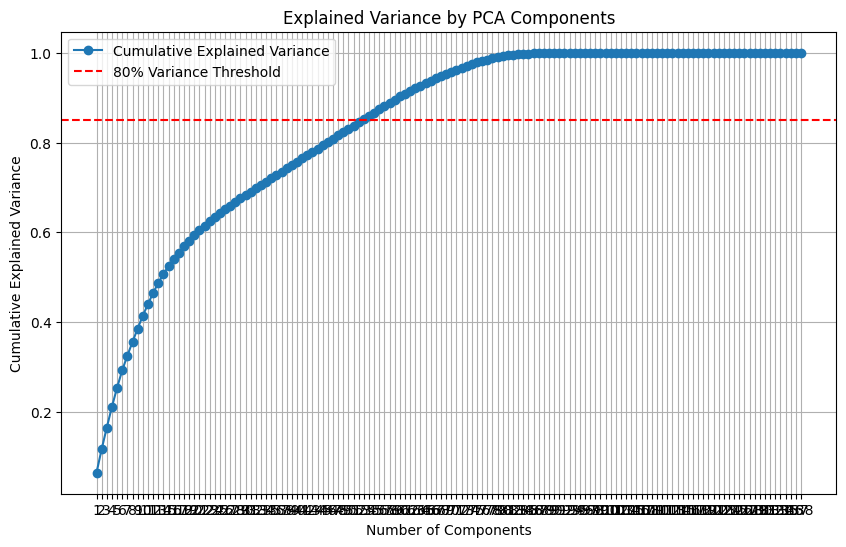

Number of components needed: 46


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_scaled is already defined and contains your scaled data
pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', label='Cumulative Explained Variance')
plt.axhline(y=0.85, color='r', linestyle='--', label='80% Variance Threshold')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.grid()
plt.show()

# Calculate the number of components needed to explain at least 80% variance
components = np.argmax(cumulative_variance >= 0.80) + 1  # Add 1 to get the count of components
print(f"Number of components needed: {components}")


In [18]:
X_pca = pca.transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

In [19]:
first_46_pcs_df = X_pca_df.iloc[:, :46].copy()

In [20]:
first_46_pcs_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46
0,-4.424973,-3.374419,0.630052,0.103905,17.913495,12.317036,-12.257000,0.757292,3.961264,12.424235,1.527398,2.319505,-4.647349,-12.374293,7.652799,-2.473692,-1.062698,0.373008,0.423712,-1.579226,-2.399470,-0.377046,0.121161,-0.507311,-1.733529,1.419853,4.690883,-0.229783,0.136261,1.382050,1.399072,-0.630103,-2.510257,-0.363785,-0.474855,-0.751609,-0.146748,0.023852,0.086781,-0.069700,0.000992,-0.003360,0.034422,-0.005677,0.037015,0.040003
1,-3.165503,-3.274472,0.494705,0.088032,12.367288,7.214545,-6.339064,0.167683,2.041813,5.773693,0.766177,1.352829,-3.364959,-4.448610,2.104334,-0.448774,-0.302262,0.165548,-0.214119,-0.609760,0.613117,-0.051081,-0.025624,0.196376,1.202245,0.561591,-0.257986,-0.255070,-0.044089,-0.702751,-0.161254,-0.060772,0.435149,-0.211651,-0.091829,0.039528,-0.032978,-0.009622,-0.010279,0.006635,0.000258,-0.001534,-0.009063,0.002187,-0.000086,-0.008272
2,-3.144057,-3.900811,0.575648,-0.131135,16.153109,-9.537643,-4.609975,-0.035356,-3.692924,4.197537,-0.190407,1.450112,1.438696,13.937511,0.850386,0.982561,-2.471208,0.924230,2.947940,3.208078,-0.459408,0.686929,0.007788,0.047002,1.139592,0.830124,-0.770177,-2.539929,2.475509,-0.027873,-1.478276,-0.401205,1.097991,1.880791,0.983592,-0.219896,0.541256,0.058079,-0.015716,-0.029090,0.019304,-0.005368,-0.009313,-0.022710,-0.013547,0.011342
3,-3.279711,-3.450557,0.559836,0.078018,13.991623,7.445662,-8.528214,0.539291,2.441729,8.515747,0.970506,2.069341,-4.450385,-7.759511,6.298902,-1.989816,-1.589159,0.109582,-0.399072,-3.444722,-0.185545,-0.532710,-0.072589,0.017516,0.099300,-0.562547,-1.069894,1.243554,-1.239355,0.074398,0.341251,0.514858,-0.157821,-0.329001,-0.090586,0.310700,-0.092888,-0.013424,-0.012382,0.031966,-0.008952,0.008245,0.009113,0.006156,-0.012473,-0.005548
4,-3.749077,-3.924373,0.643243,0.136529,16.164431,12.268235,-10.842578,0.495200,4.003513,10.983058,1.377585,2.718990,-6.646299,-12.517640,7.664954,-2.374755,-2.539845,0.686429,0.704345,-2.809806,-1.517287,-0.554009,-0.037490,0.137316,0.372937,-0.169871,-1.405349,-0.013307,-1.071588,-0.820887,0.053653,0.569584,0.314305,-0.215324,-0.110325,0.165406,-0.016032,-0.001328,-0.016213,0.028228,-0.006618,0.004991,0.005349,0.001658,-0.018412,-0.003543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15144,-0.575600,-0.786805,-0.003907,0.070387,-0.957201,-0.089355,-0.372317,-0.025270,-0.012220,0.114315,-0.009032,0.018236,0.029353,0.009319,0.080731,0.007033,-0.102195,-0.366553,-0.058200,0.037214,-0.038445,0.073197,0.014353,0.056580,-0.141509,0.036758,0.076622,-0.216909,-0.109628,-0.191680,0.093501,0.096997,-0.015251,0.078169,0.048027,0.035160,0.039886,0.001130,-0.005683,0.012132,-0.000388,0.005162,0.004448,-0.003072,-0.004584,-0.002921
15145,-0.534838,-0.801626,-0.009471,0.058853,-0.947914,-0.072177,-0.349596,0.115313,-0.019473,0.121339,-0.029518,0.033497,0.037334,0.013713,0.120071,0.068635,-0.347356,-0.597717,0.026013,-0.044665,0.073497,0.106136,-0.032754,-0.157708,0.211706,-0.071959,-0.142974,0.310657,0.337759,0.345957,-0.205030,-0.177682,0.077992,-0.003448,-0.017041,-0.080740,-0.017403,-0.010059,0.007367,-0.008864,0.002716,-0.003997,-0.011495,-0.000816,0.012464,-0.006478
15146,-0.077568,-0.893679,-0.000695,-0.062371,-0.985513,-0.245027,-0.443282,0.011321,-0.002922,0.183471,-0.002905,0.015966,0.029920,0.000397,0.048039,0.016372,-0.121988,-0.446031,-0.025289,0.045953,0.018960,0.006226,0.002809,0.025919,0.038233,0.000281,-0.010582,0.056635,0.024951,0.058559,-0.027606,-0.033408,-0.006705,-0.032489,-0.020676,-0.012151,-0.017506,0.002817,0.002245,-0.007473,-0.000049,-0.002847,-0.000268,0.002003,0.000222,0.004054
15147,-0.075657,-0.894374,-0.000956,-0.06291

In [21]:
import numpy as np

# Get the PCA components (loadings)
components = pca.components_[:46]  # First 18 principal components

# Create a DataFrame for feature loadings
feature_loadings_df = pd.DataFrame(components.T, columns=[f'PC{i+1}' for i in range(components.shape[0])],
                                    index = one_hot_encoded_df2.drop(columns=['is_proficient']).columns)

# Find the most important features for each principal component
top_features = {}

for pc in feature_loadings_df.columns:
    # Get the absolute values of the loadings and sort them
    sorted_features = feature_loadings_df[pc].abs().sort_values(ascending=False)
    # Select the top 5 features (you can adjust this number)
    top_features[pc] = sorted_features.head(5).index.tolist()

# Display the top features for each principal component
for pc, features in top_features.items():
    print(f'Top features for {pc}: {features}')

Top features for PC1: ['course_HOMEROOM', 'course_LANGUAGE 3', 'course_MATH 3', 'course_PE 3', 'course_SCIENCE 3']
Top features for PC2: ['course_CivicsGr 7', 'course_Geog Gr7', 'course_English Gr 7', 'course_Math 7', 'course_LifeSci Gr7']
Top features for PC3: ['course_WLDHIS 1500', 'course_English Gr 8', 'course_PhySci Gr 8', 'course_CareerPrepA5', 'course_Advisory 8']
Top features for PC4: ['course_READING 4', 'course_LANGUAGE 4', 'course_MATH 4', 'course_SCIENCE 4', 'course_SOC ST 4']
Top features for PC5: ['course_EnrichmtP6', 'school_Middle School A', 'course_English LA 5', 'course_Science Gr 5', 'course_SocialStuGr5']
Top features for PC6: ['course_MATH 6', 'course_English LA 6', 'course_PE 6', 'course_Science Gr 6', 'course_English LA 5']
Top features for PC7: ['school_Middle School D', 'course_SoSt6H/A', 'course_SciGr6H/A', 'course_Math6H/Adv', 'course_ELAGrPK6H/Ad']
Top features for PC8: ['course_CivicH/Adv 7', 'course_GeogH/AdvGr7', 'course_LifeSciH Gr7', 'course_Eng 7 H/Adv

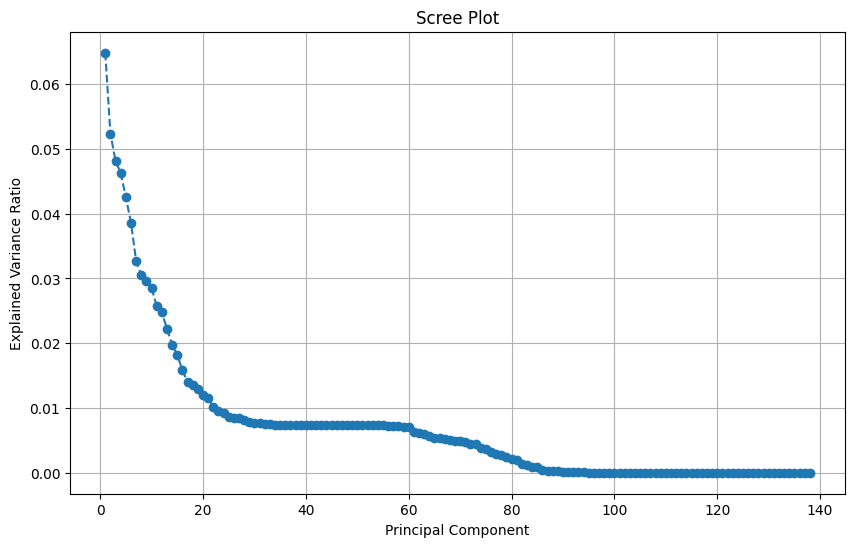

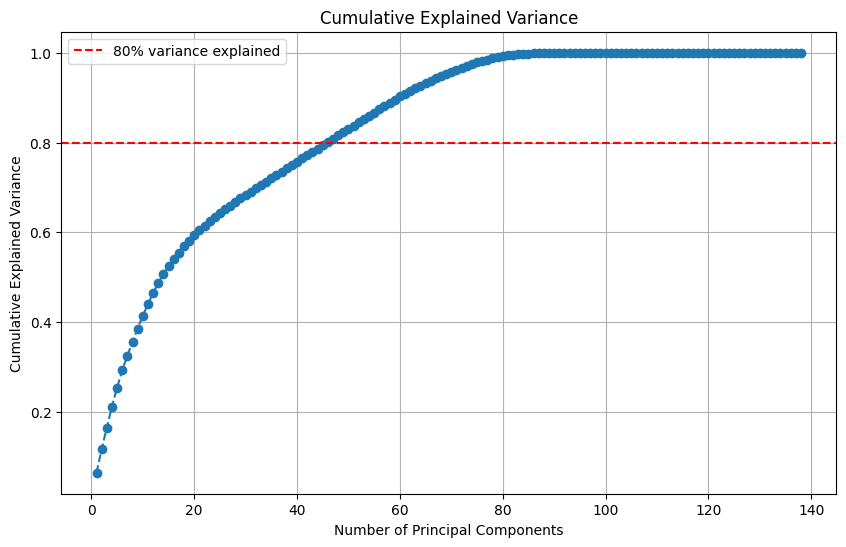

In [22]:

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Cumulative Explained Variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% variance explained')  # Adjust threshold as needed
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


In [23]:

from sklearn.model_selection import train_test_split


In [24]:
X = first_46_pcs_df  # PCA-transformed features
y = one_hot_encoded_df2['is_proficient']  # Labels


In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Binary XGboost

[0]	train-logloss:0.57209	eval-logloss:0.58173
[1]	train-logloss:0.52896	eval-logloss:0.53851
[2]	train-logloss:0.49404	eval-logloss:0.50396
[3]	train-logloss:0.46471	eval-logloss:0.47533
[4]	train-logloss:0.43990	eval-logloss:0.45123
[5]	train-logloss:0.41909	eval-logloss:0.43121
[6]	train-logloss:0.40055	eval-logloss:0.41348
[7]	train-logloss:0.38464	eval-logloss:0.39811
[8]	train-logloss:0.37155	eval-logloss:0.38561
[9]	train-logloss:0.35984	eval-logloss:0.37469
[10]	train-logloss:0.34902	eval-logloss:0.36453
[11]	train-logloss:0.33995	eval-logloss:0.35594
[12]	train-logloss:0.33157	eval-logloss:0.34796
[13]	train-logloss:0.32414	eval-logloss:0.34118
[14]	train-logloss:0.31724	eval-logloss:0.33496
[15]	train-logloss:0.31098	eval-logloss:0.32950
[16]	train-logloss:0.30552	eval-logloss:0.32476
[17]	train-logloss:0.30076	eval-logloss:0.32083
[18]	train-logloss:0.29668	eval-logloss:0.31739
[19]	train-logloss:0.29258	eval-logloss:0.31397
[20]	train-logloss:0.28925	eval-logloss:0.31117
[2

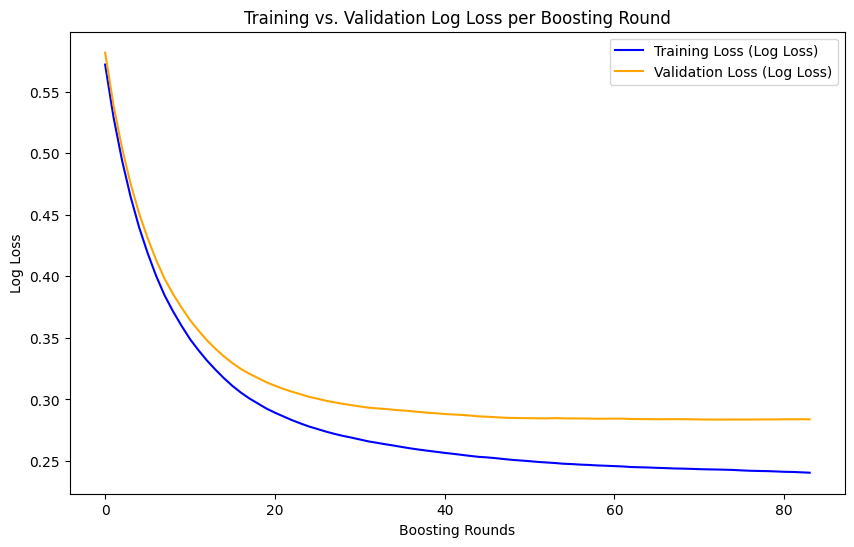

Confusion Matrix:
[[1869  160]
 [ 207  794]]
Accuracy: 0.88
Macro F1 Score: 0.86

Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.92      0.91      2029
        True       0.83      0.79      0.81      1001

    accuracy                           0.88      3030
   macro avg       0.87      0.86      0.86      3030
weighted avg       0.88      0.88      0.88      3030



In [26]:
from xgboost import DMatrix, train
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
import numpy as np
import matplotlib.pyplot as plt


# Prepare data in DMatrix format
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# Parameters for XGBoost binary classification
params = {
    'max_depth': 5,  # Reduced depth to limit complexity
    'learning_rate': 0.1,
    'reg_alpha': 0.1,  # L1 regularization
    'reg_lambda': 0.1,  # L2 regularization
    'objective': 'binary:logistic',  # Binary classification objective
    'random_state': 42,
    'eval_metric': 'logloss'  # Use Log Loss for binary classification
}

# Track evaluation metrics for training and validation
evals = [(dtrain, 'train'), (dtest, 'eval')]
evals_result = {}

# Train the XGBoost model with early stopping
xgb_model_trained = train(
    params,
    dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True,
    evals_result=evals_result
)

# Extract training and validation losses
train_loss = evals_result['train']['logloss']
validation_loss = evals_result['eval']['logloss']

# Plot training vs. validation log loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (Log Loss)', color='blue')
plt.plot(validation_loss, label='Validation Loss (Log Loss)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('Log Loss')
plt.title('Training vs. Validation Log Loss per Boosting Round')
plt.legend()
plt.show()

# Make predictions
xgb_y_pred_prob = xgb_model_trained.predict(dtest)  # Probabilities
xgb_y_pred = (xgb_y_pred_prob > 0.5).astype(int)  # Binary predictions using a 0.5 threshold

# Evaluate the model
conf_matrix = confusion_matrix(y_test, xgb_y_pred)
accuracy = accuracy_score(y_test, xgb_y_pred)
macro_f1 = f1_score(y_test, xgb_y_pred, average='macro')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Macro F1 Score: {macro_f1:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, xgb_y_pred))


# metric comparison

In [28]:
# Extract values from the confusion matrix
n1, n2 = conf_matrix[0]  # TN, FP
n3, n4 = conf_matrix[1]  # FN, TP

# Calculate metrics
precision = n4 / (n4 + n2) if (n4 + n2) != 0 else 0  # Avoid division by zero
tpr = n4 / (n4 + n3) if (n4 + n3) != 0 else 0        # Sensitivity (Recall)
tnr = n1 / (n1 + n2) if (n1 + n2) != 0 else 0        # Specificity

print(f"Precision: {precision:.4f}")
print(f"True Positive Rate (TPR/Sensitivity): {tpr:.4f}")
print(f"True Negative Rate (TNR/Specificity): {tnr:.4f}")

Precision: 0.8323
True Positive Rate (TPR/Sensitivity): 0.7932
True Negative Rate (TNR/Specificity): 0.9211


In [29]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Macro F1 Score: {macro_f1:.2f}")

Accuracy: 0.88
Macro F1 Score: 0.86


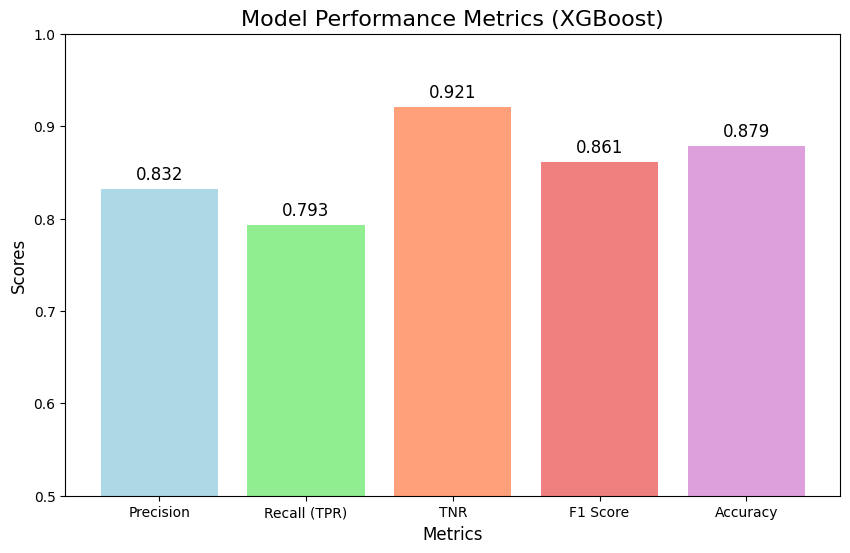

In [30]:


# Metrics and their corresponding values
metrics = ['Precision', 'Recall (TPR)', 'TNR', 'F1 Score', 'Accuracy']
values = [precision, tpr, tnr, macro_f1, accuracy]

colors = ['lightblue', 'lightgreen', 'lightsalmon', 'lightcoral', 'plum']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=colors)

# Adding title and labels
plt.title('Model Performance Metrics (XGBoost)', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)

# Setting y-axis limits from 0.5 to 1
plt.ylim(0.5, 1)

# Display the values on top of the bars
for i in range(len(values)):
    plt.text(i, values[i] + 0.01, f'{values[i]:.3f}', ha='center', fontsize=12)

plt.show()
